In [1]:
# 필요한 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier

In [2]:
# 데이터 로드
file_path = "content/heart_failure_clinical_records_dataset.csv"
df = pd.read_csv(file_path)

## 데이터 로드 및 전처리
데이터를 불러오고, 수치형과 범주형 데이터를 구분한 후, 표준화를 진행합니다.

In [3]:
# 수치형 입력 데이터, 범주형 입력 데이터, 출력 데이터로 구분하기
X_num = df[ ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium']]
X_cat = df[ [ 'anaemia', 'diabetes', 'high_blood_pressure', 'sex' , 'smoking']]
y = df['DEATH_EVENT']

In [4]:
# 수치형 입력 데이터를 전처리하고 입력 데이터 통합하기
scaler = StandardScaler()
scaler.fit(X_num)
X_scaled = scaler.transform(X_num)
X_scaled = pd.DataFrame(data= X_scaled, index = X_num.index, columns = X_num.columns)
X = pd.concat([X_scaled, X_cat], axis = 1)

## 모델 학습 및 평가
- **Random Forest**: 다수의 결정 트리를 활용하는 앙상블 기법으로 강력한 성능을 가짐.
- **Logistic Regression**: 기본적인 선형 모델로 해석이 용이함.
- **XGBoost**: 부스팅 기반의 강력한 모델로 특히 비선형 데이터에서 높은 성능을 보임.

In [5]:
# 사용할 특징(Feature)과 타겟 설정
features = ['age', 'ejection_fraction', 'serum_creatinine', 'time', 
            'high_blood_pressure', 'diabetes', 'anaemia', 'smoking']
target = 'DEATH_EVENT'

X = df[features]
y = df[target]

## 데이터 분할
데이터를 훈련 세트와 테스트 세트로 나누어 모델 학습

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Random Forest 모델 학습
랜덤 포레스트 모델을 학습하고, 성능을 평가합니다.
이 모델은 다수의 결정 트리를 이용하여 강력한 성능을 제공합니다.

In [8]:
# 모델 1: 랜덤 포레스트(Random Forest)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
rf_pred = rf_model.predict(X_test_scaled)
rf_acc = accuracy_score(y_test, rf_pred)

## Logistic Regression 모델 학습
로지스틱 회귀 모델을 학습하고, 테스트 데이터를 이용해 성능을 평가합니다.

In [9]:
# 모델 2: 로지스틱 회귀(Logistic Regression)
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_scaled, y_train)
lr_pred = lr_model.predict(X_test_scaled)
lr_acc = accuracy_score(y_test, lr_pred)


## XGBoost 모델 학습
XGBoost 모델을 학습하고, 성능을 평가합니다.
부스팅 기반 모델로 성능이 우수하며, 특히 비선형 데이터에 강합니다.

In [10]:
# 모델 3: XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)
xgb_model.fit(X_train_scaled, y_train)
xgb_pred = xgb_model.predict(X_test_scaled)
xgb_acc = accuracy_score(y_test, xgb_pred)

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [01:29:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [11]:
# 성능 비교
model_results = pd.DataFrame({
    "Model": ["Random Forest", "Logistic Regression", "XGBoost"],
    "Accuracy": [rf_acc, lr_acc, xgb_acc]
})


In [12]:
# 분류 보고서 출력
rf_report = classification_report(y_test, rf_pred, output_dict=True)
lr_report = classification_report(y_test, lr_pred, output_dict=True)
xgb_report = classification_report(y_test, xgb_pred, output_dict=True)

In [13]:
rf_report_df = pd.DataFrame(rf_report).transpose()
lr_report_df = pd.DataFrame(lr_report).transpose()
xgb_report_df = pd.DataFrame(xgb_report).transpose()

In [20]:
print("랜덤 포레스트 분류 보고서")
print(rf_report_df)

print("\n로지스틱 회귀 분류 보고서")
print(lr_report_df)

print("\nXGBoost 분류 보고서")
print(xgb_report_df)


랜덤 포레스트 분류 보고서
              precision    recall  f1-score    support
0              0.744186  0.914286  0.820513  35.000000
1              0.823529  0.560000  0.666667  25.000000
accuracy       0.766667  0.766667  0.766667   0.766667
macro avg      0.783858  0.737143  0.743590  60.000000
weighted avg   0.777246  0.766667  0.756410  60.000000

로지스틱 회귀 분류 보고서
              precision    recall  f1-score    support
0              0.761905  0.914286  0.831169  35.000000
1              0.833333  0.600000  0.697674  25.000000
accuracy       0.783333  0.783333  0.783333   0.783333
macro avg      0.797619  0.757143  0.764422  60.000000
weighted avg   0.791667  0.783333  0.775546  60.000000

XGBoost 분류 보고서
              precision    recall  f1-score    support
0              0.720930  0.885714  0.794872  35.000000
1              0.764706  0.520000  0.619048  25.000000
accuracy       0.733333  0.733333  0.733333   0.733333
macro avg      0.742818  0.702857  0.706960  60.000000
weighted avg   0.7

## 모델 성능 비교 결과
### 1. Random Forest 분류 보고서
- 정확도(Accuracy): **0.7667**
- 0 클래스의 Precision: 0.744
- 1 클래스의 Recall: 0.56
- 평균 F1-score: 0.756

### 2. Logistic Regression 분류 보고서
- 정확도(Accuracy): **0.7833**
- 0 클래스의 Precision: 0.761
- 1 클래스의 Recall: 0.6
- 평균 F1-score: 0.775

### 3. XGBoost 분류 보고서
- 정확도(Accuracy): **0.7333**
- 0 클래스의 Precision: 0.720
- 1 클래스의 Recall: 0.52
- 평균 F1-score: 0.721

### 결론
- **Logistic Regression** 모델이 가장 높은 정확도(78.33%)를 기록했으며, 평균 F1-score도 가장 높음.
- **Random Forest**는 안정적인 성능을 보이지만, 1 클래스(Positive Class)의 Recall이 낮음.
- **XGBoost**는 다소 낮은 성능을 기록하였으며, Recall 성능이 가장 낮음.

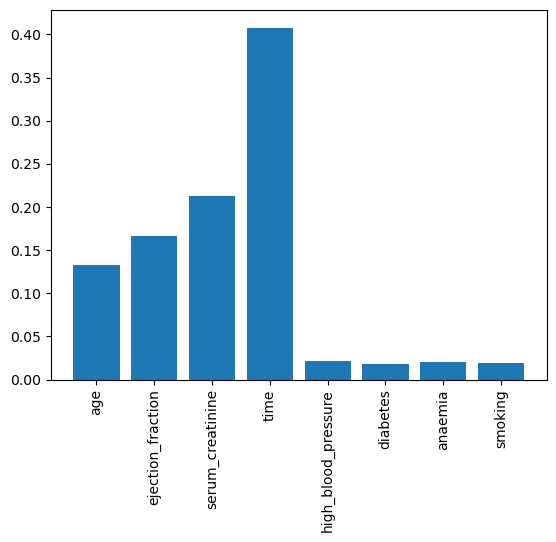

In [ ]:
# 랜덤포레스트 모델의 feature_importances_를 이용하여 중요도 plot
plt.bar(X.columns, rf_model.feature_importances_)
plt.xticks(rotation= 90)
plt.show()

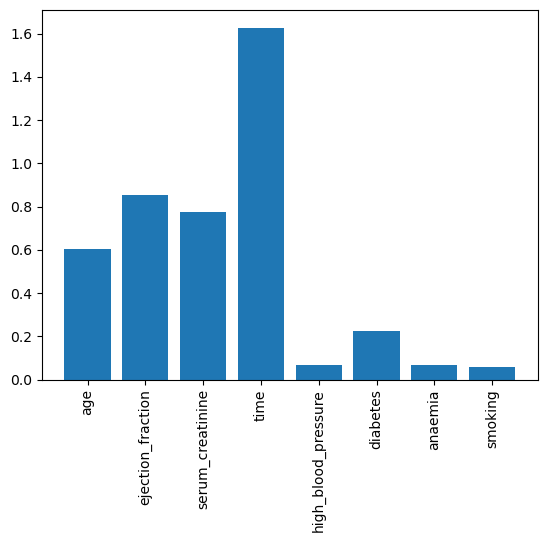

In [ ]:
# Logistic Regression 특성 중요도 시각화
import numpy as np

lr_importance = np.abs(lr_model.coef_[0]) 
plt.bar(X.columns, lr_importance)
plt.xticks(rotation=90)
plt.show()


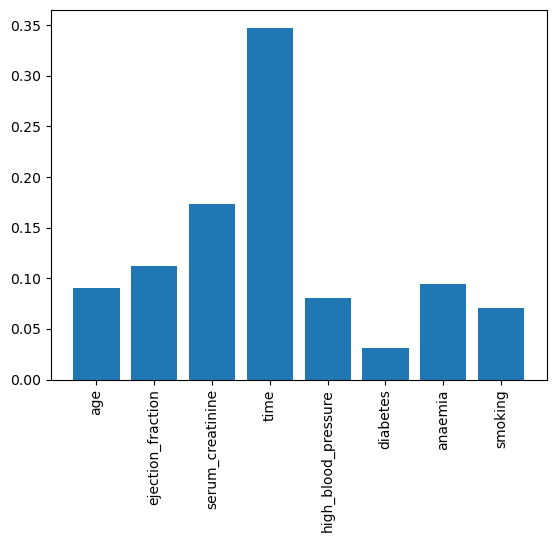

In [14]:
# XGBClassifier 모델의 feature_importances_를 이용하여 중요도 plot
plt.bar(X.columns, xgb_model.feature_importances_)
plt.xticks(rotation= 90)
plt.show()